Initialization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             mean_squared_log_error)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

Data

In [2]:
hourdata = pd.read_csv('hour.csv')
daydata = pd.read_csv('day.csv')

In [3]:
hourdata.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
daydata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hourdata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
daydata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
hourdata.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
daydata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Nulls analysis

In [9]:
hourdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
daydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Duplicates analysis

In [11]:
hour_dupdata = hourdata.copy()
hour_dupdata.drop_duplicates(inplace= True)
day_dupdata = daydata.copy()
day_dupdata.drop_duplicates(inplace= True)


In [12]:
print(hourdata.shape)
print(hour_dupdata.shape)  

(17379, 17)
(17379, 17)


In [13]:
print(daydata.shape)
print(day_dupdata.shape)

(731, 16)
(731, 16)


Data cleaning

In [14]:
daydata.drop(columns=['dteday','instant','casual','registered'], axis=1, inplace=True)
hourdata.drop(columns=['dteday','instant','casual','registered'], axis=1, inplace=True)

In [15]:
daydata['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace =True)
daydata['weathersit'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Rain', 4: 'Heavy Rain'}, inplace =True)
daydata['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace =True)
daydata['mnth'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}, inplace =True)

hourdata['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace =True)
hourdata['weathersit'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Rain', 4: 'Heavy Rain'}, inplace =True)
hourdata['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace =True)
hourdata['mnth'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}, inplace =True)


In [16]:
daydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.7+ KB


In [17]:
hourdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  object 
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  object 
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  object 
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.7+ MB


EDA

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4648\273042002.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


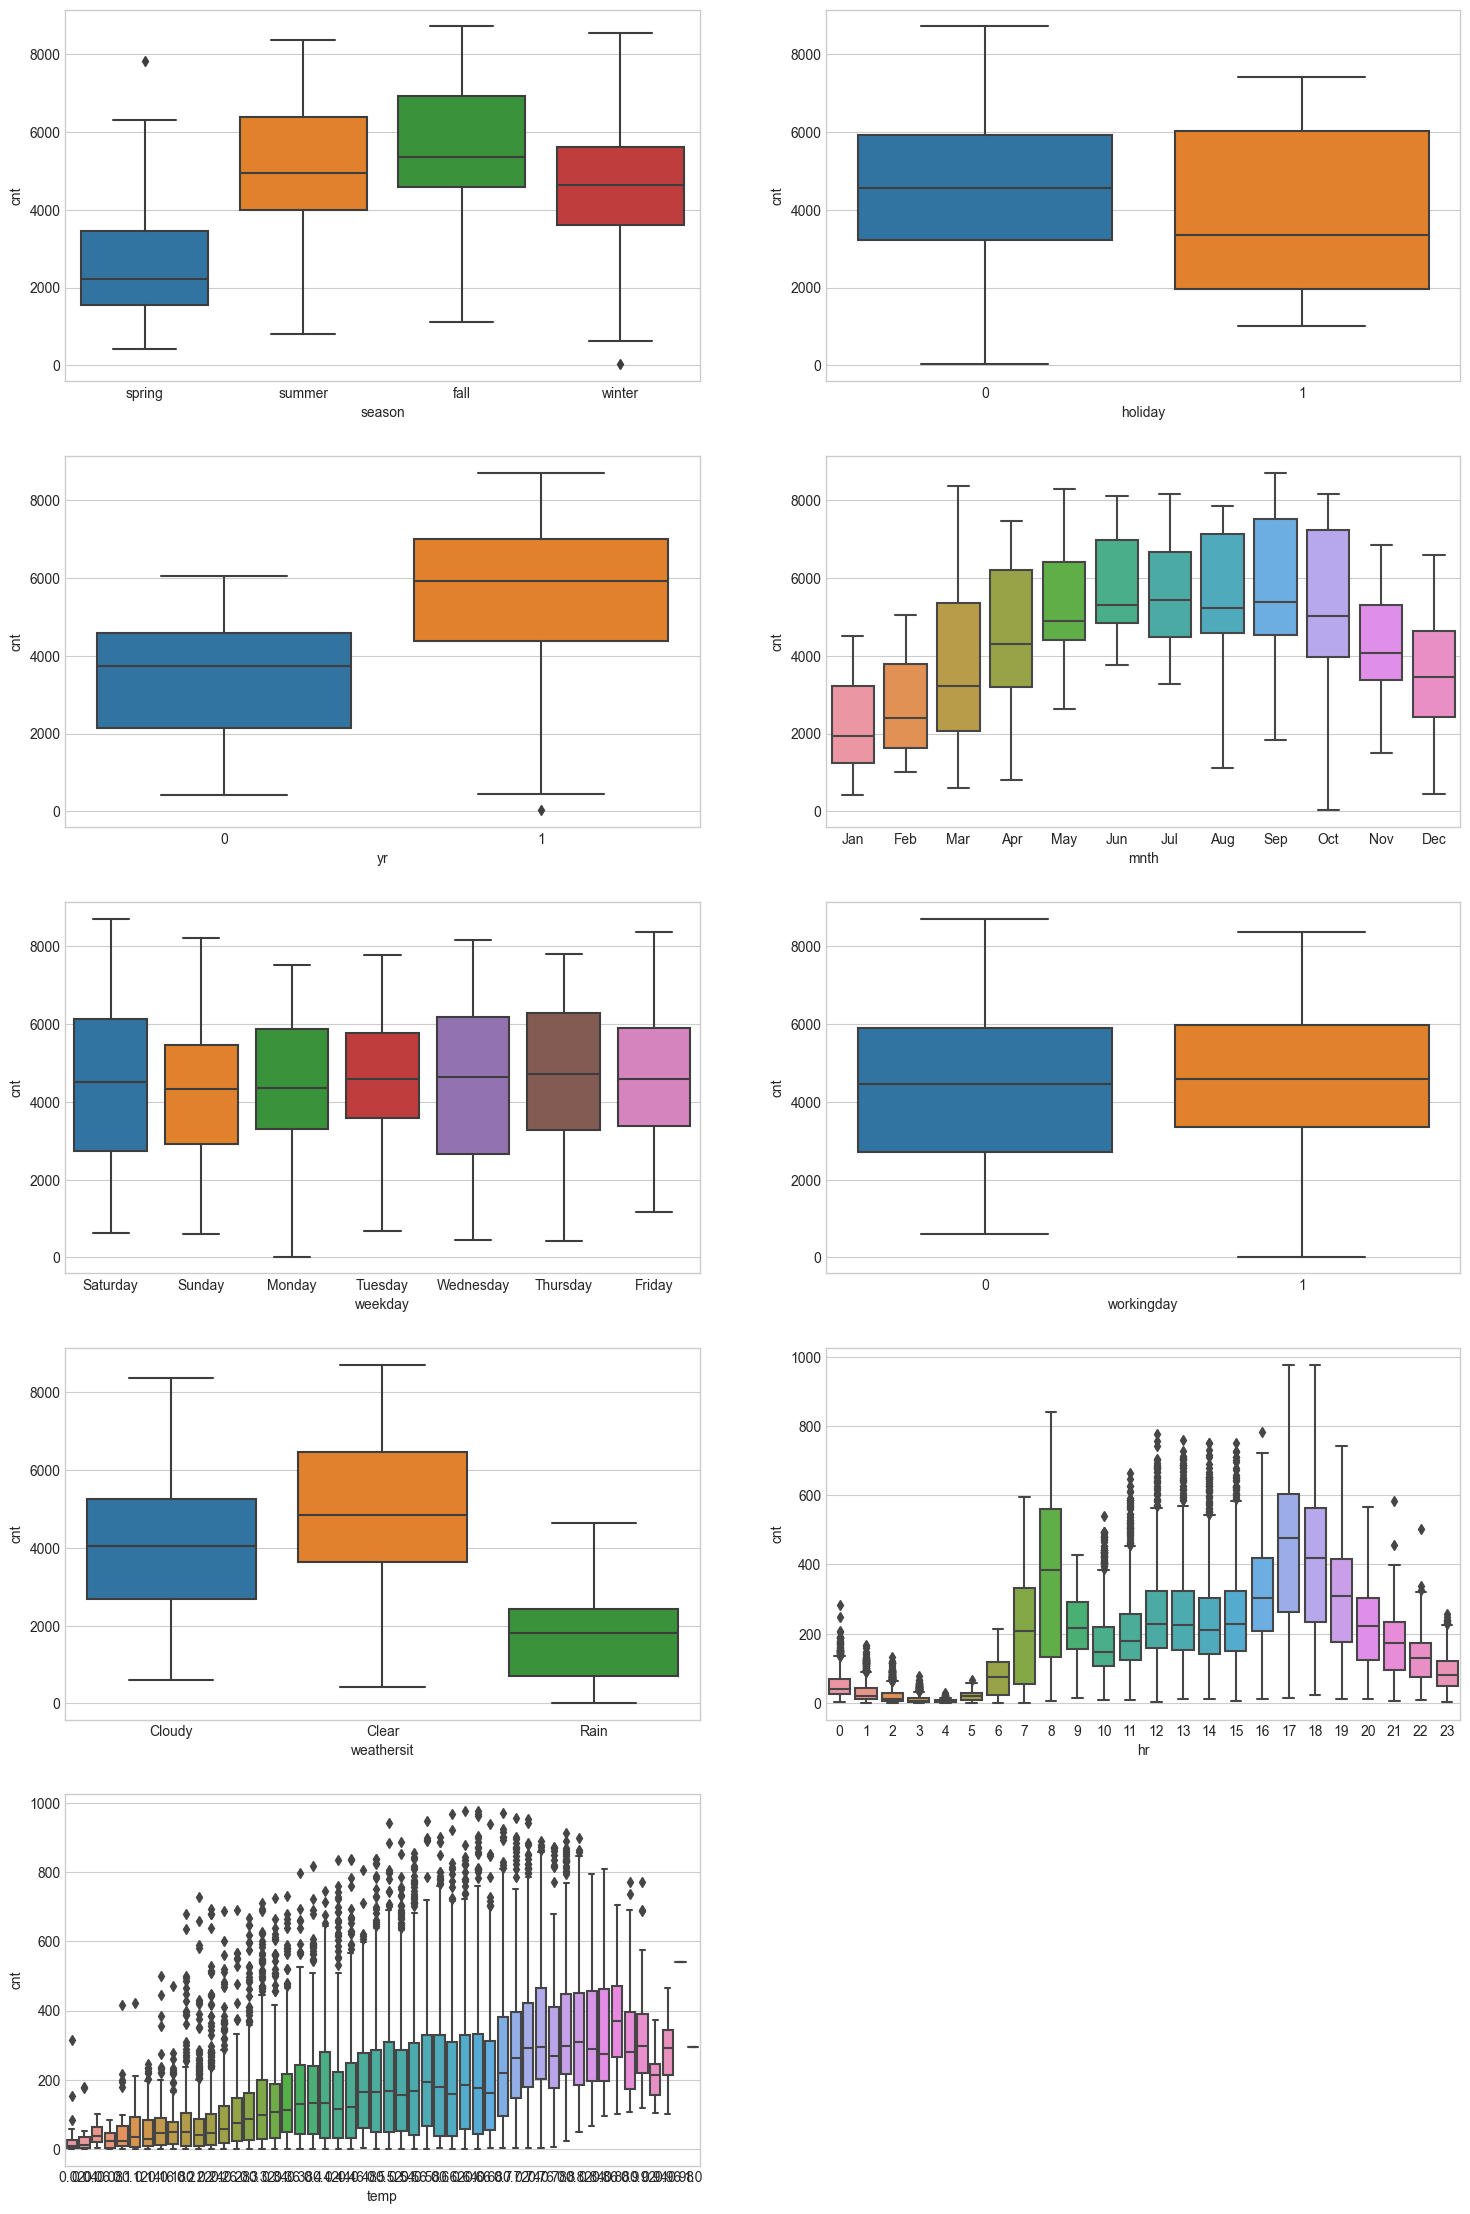

In [18]:
plt.figure(figsize=(18, 28))
plt.style.use('seaborn-whitegrid')

plt.subplot(5,2,1)
sns.boxplot(x='season', y='cnt', data= daydata)

plt.subplot(5,2,2)
sns.boxplot(x='holiday', y='cnt', data= daydata)

plt.subplot(5,2,3)
sns.boxplot(x='yr', y= 'cnt', data= daydata)

plt.subplot(5,2,4)
sns.boxplot(x='mnth', y='cnt', data= daydata)

plt.subplot(5,2,5)
sns.boxplot(x='weekday', y='cnt', data= daydata)

plt.subplot(5,2,6)
sns.boxplot(x='workingday', y='cnt', data= daydata)

plt.subplot(5,2,7)
sns.boxplot(x='weathersit', y='cnt', data= daydata)

plt.subplot(5,2,8)
sns.boxplot(x='hr', y='cnt', data= hourdata)

plt.subplot(5,2,9)
sns.boxplot(x='temp', y='cnt', data= hourdata)

plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4648\1686490860.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=daydata[cols], y=daydata['cnt'], fill=True, alpha=1, ci=None, ax=ax[i], palette=('#17252a', '#2b7a78','#3aafa9',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4648\1686490860.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=daydata[cols], y=daydata['cnt'], fill=True, alpha=1, ci=None, ax=ax[i], palette=('#17252a', '#2b7a78','#3aafa9',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4648\1686490860.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=daydata[cols], y=daydata['cnt'], fill=True, alpha=1, ci=None, ax=ax[i], palette=('#17252a', '#2b7a78','#3aafa9',
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4648\1686490860.py:12: FutureWarning: 

The `ci` paramete

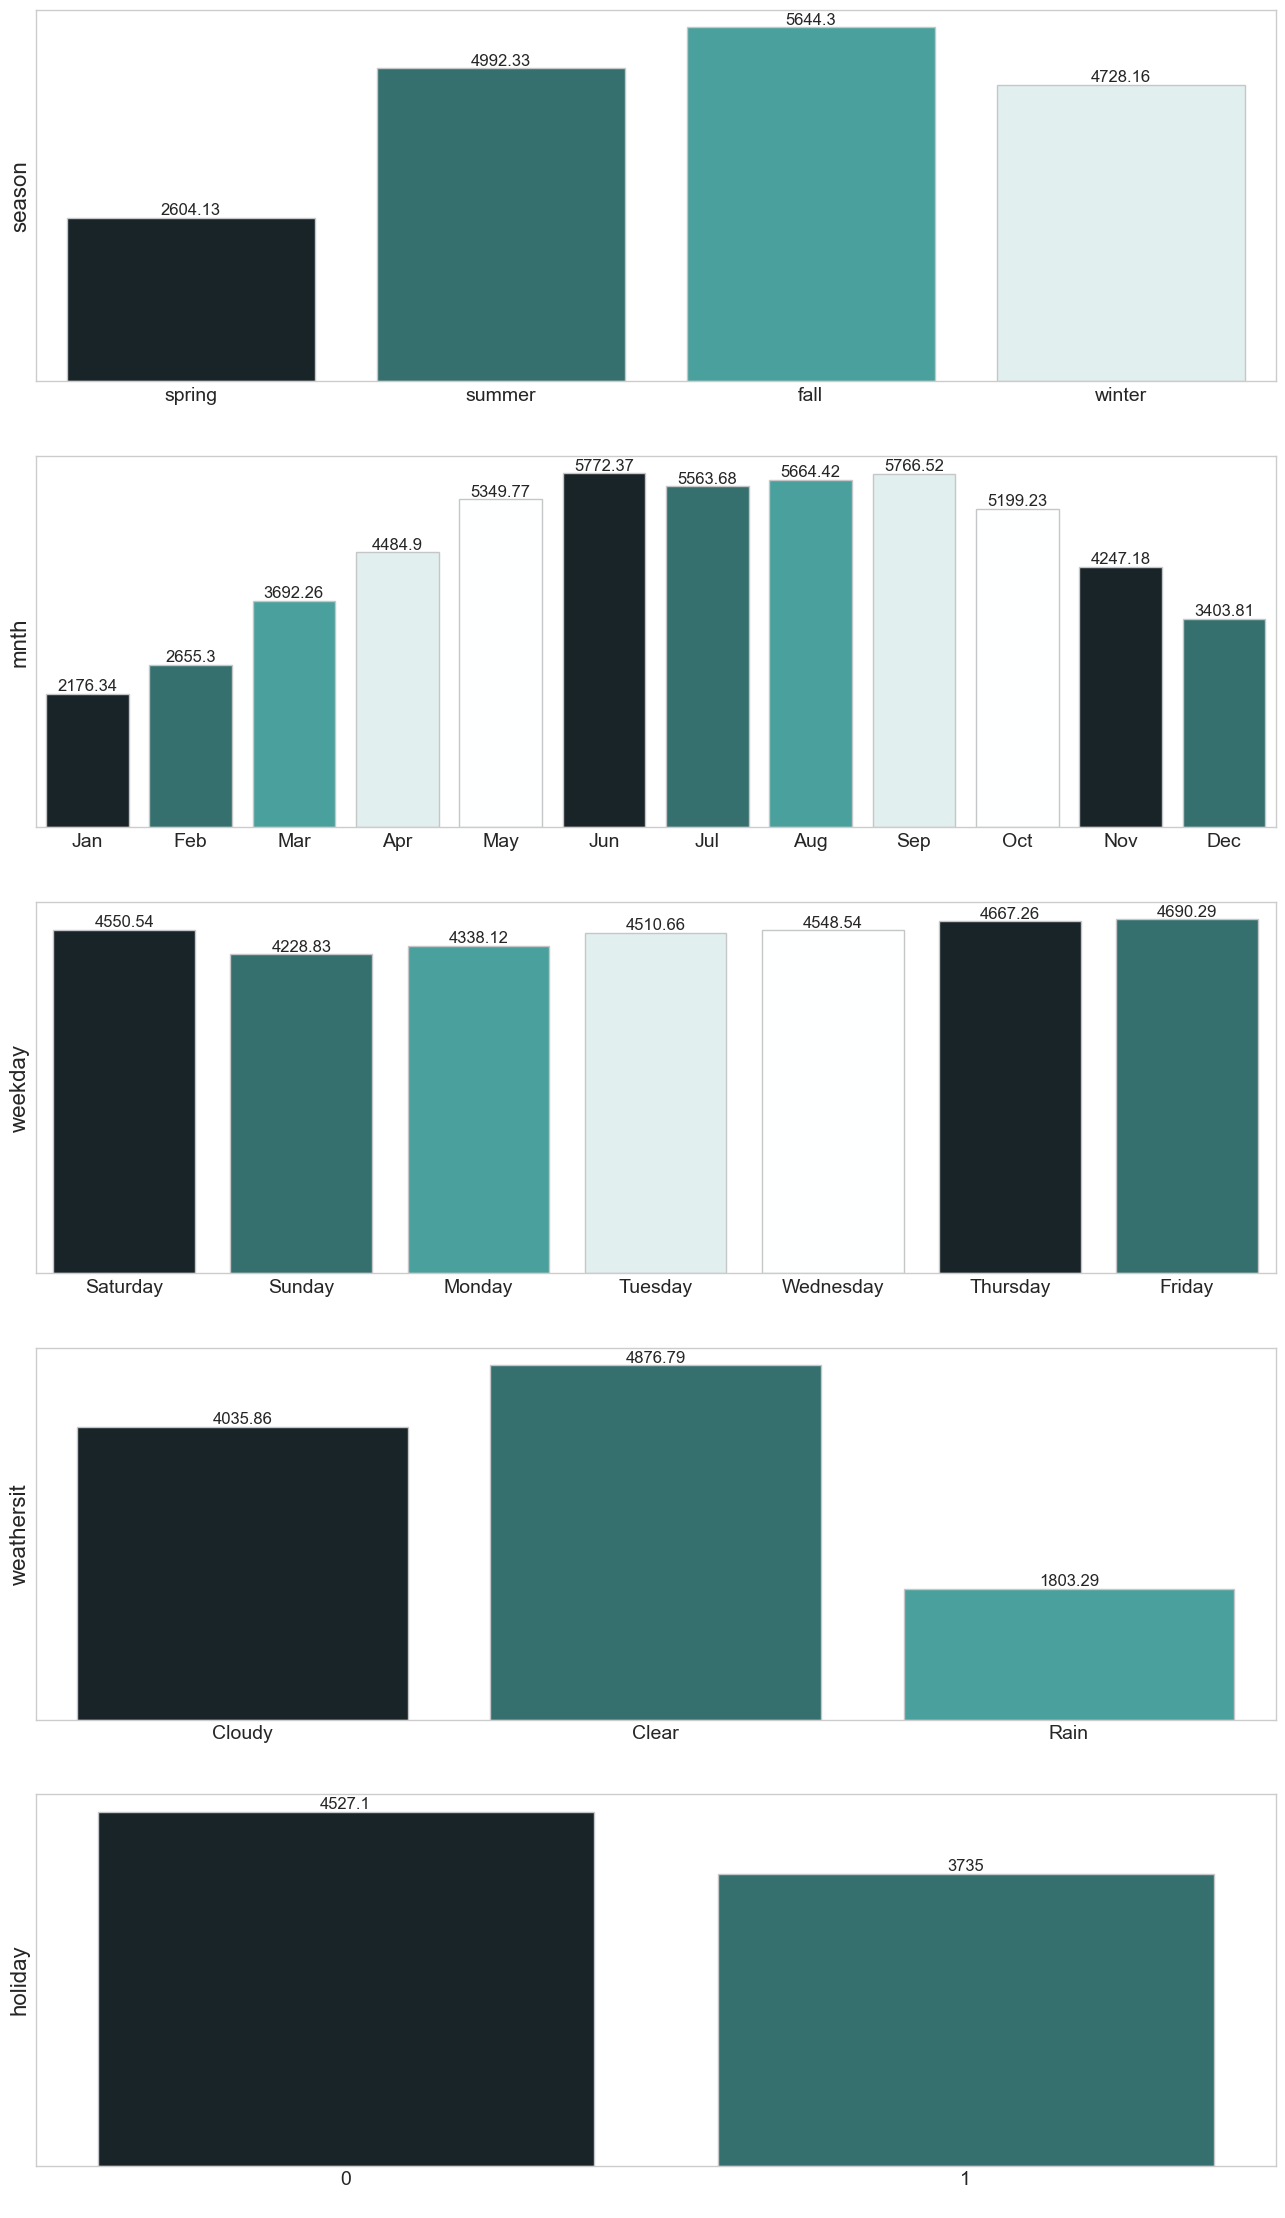

In [19]:
num_cols = list(daydata.select_dtypes(["int64","float64"]))
cat_cols = list(daydata.select_dtypes("object"))

cat_col_vis = ['season','mnth','weekday','weathersit','holiday']

fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(16, 28))
                
i = 0 #counter

for cols in cat_col_vis:
    
    sns.barplot(x=daydata[cols], y=daydata['cnt'], fill=True, alpha=1, ci=None, ax=ax[i], palette=('#17252a', '#2b7a78','#3aafa9',
                                                                                                     '#def2f1','#feffff'),
                                                                                            edgecolor="#c5c6c7")
                
    ax[i].set_xlabel(' ')
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].xaxis.set_tick_params(labelsize=14)
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].set_ylabel(cols, fontsize=16)    
    ax[i].grid(False)
    ax[i].bar_label(ax[i].containers[0], size="12")
    i=i+1
    
      
plt.show()

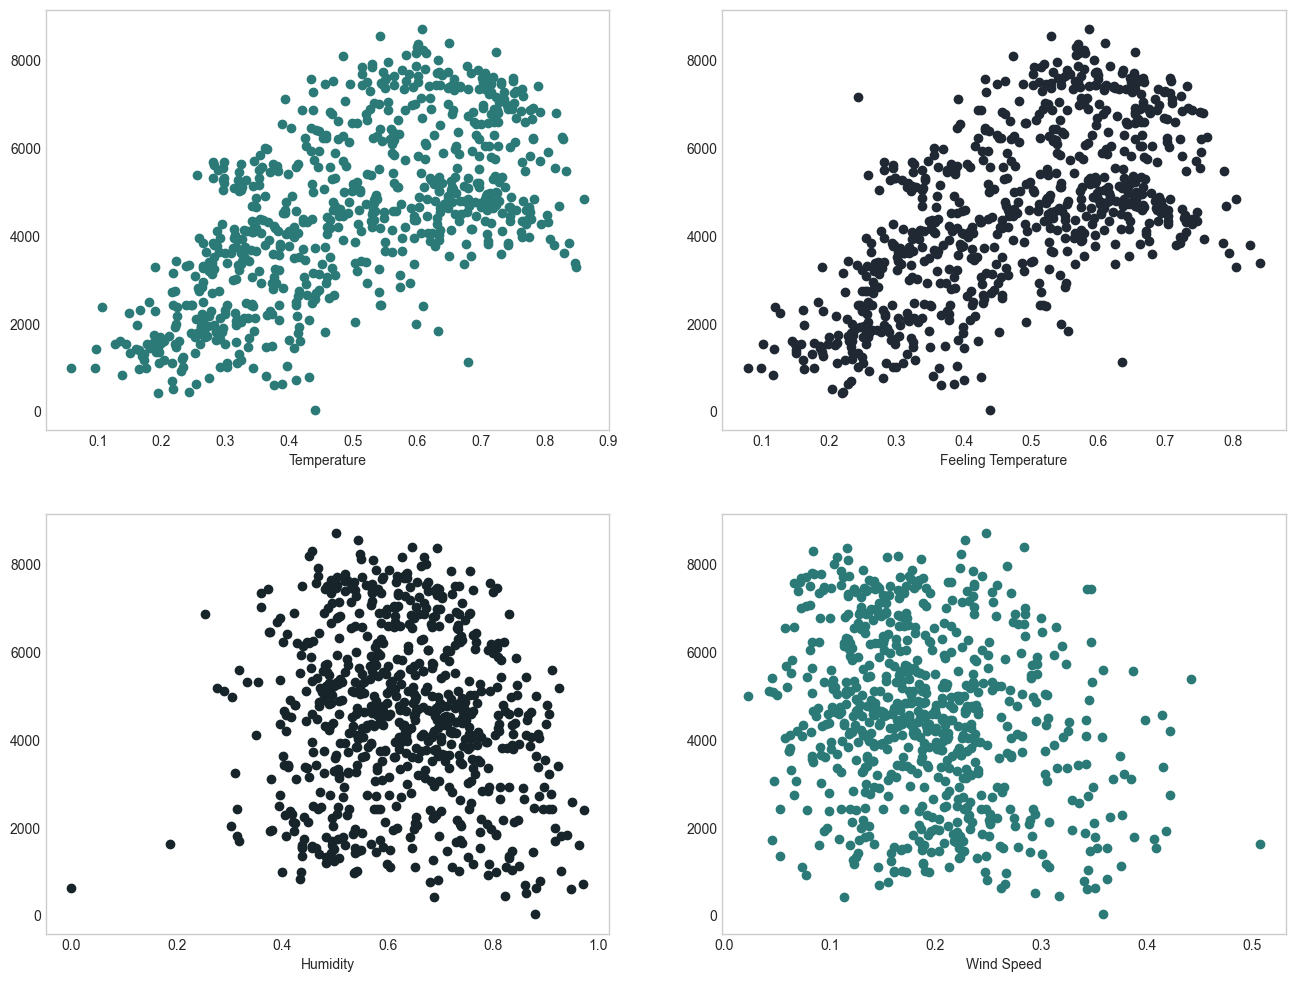

In [23]:
plt.figure(figsize=[16,12])
plt.subplot(2,2,1)
plt.scatter( x=daydata['temp'], y=daydata['cnt'], c="#2b7a78")
plt.xlabel("Temperature")
plt.grid(False)
plt.subplot(2,2,2)
plt.scatter( x=daydata['atemp'], y=daydata['cnt'], c='#1f2833')
plt.xlabel("Feeling Temperature")
plt.grid(False)
plt.subplot(2,2,3)
plt.scatter( x=daydata['hum'], y=daydata['cnt'], c='#17252a')
plt.xlabel("Humidity")
plt.grid(False)
plt.subplot(2,2,4)
plt.scatter( x=daydata['windspeed'], y=daydata['cnt'], c="#2b7a78")
plt.xlabel("Wind Speed")
plt.grid(False)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4648\2867131375.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


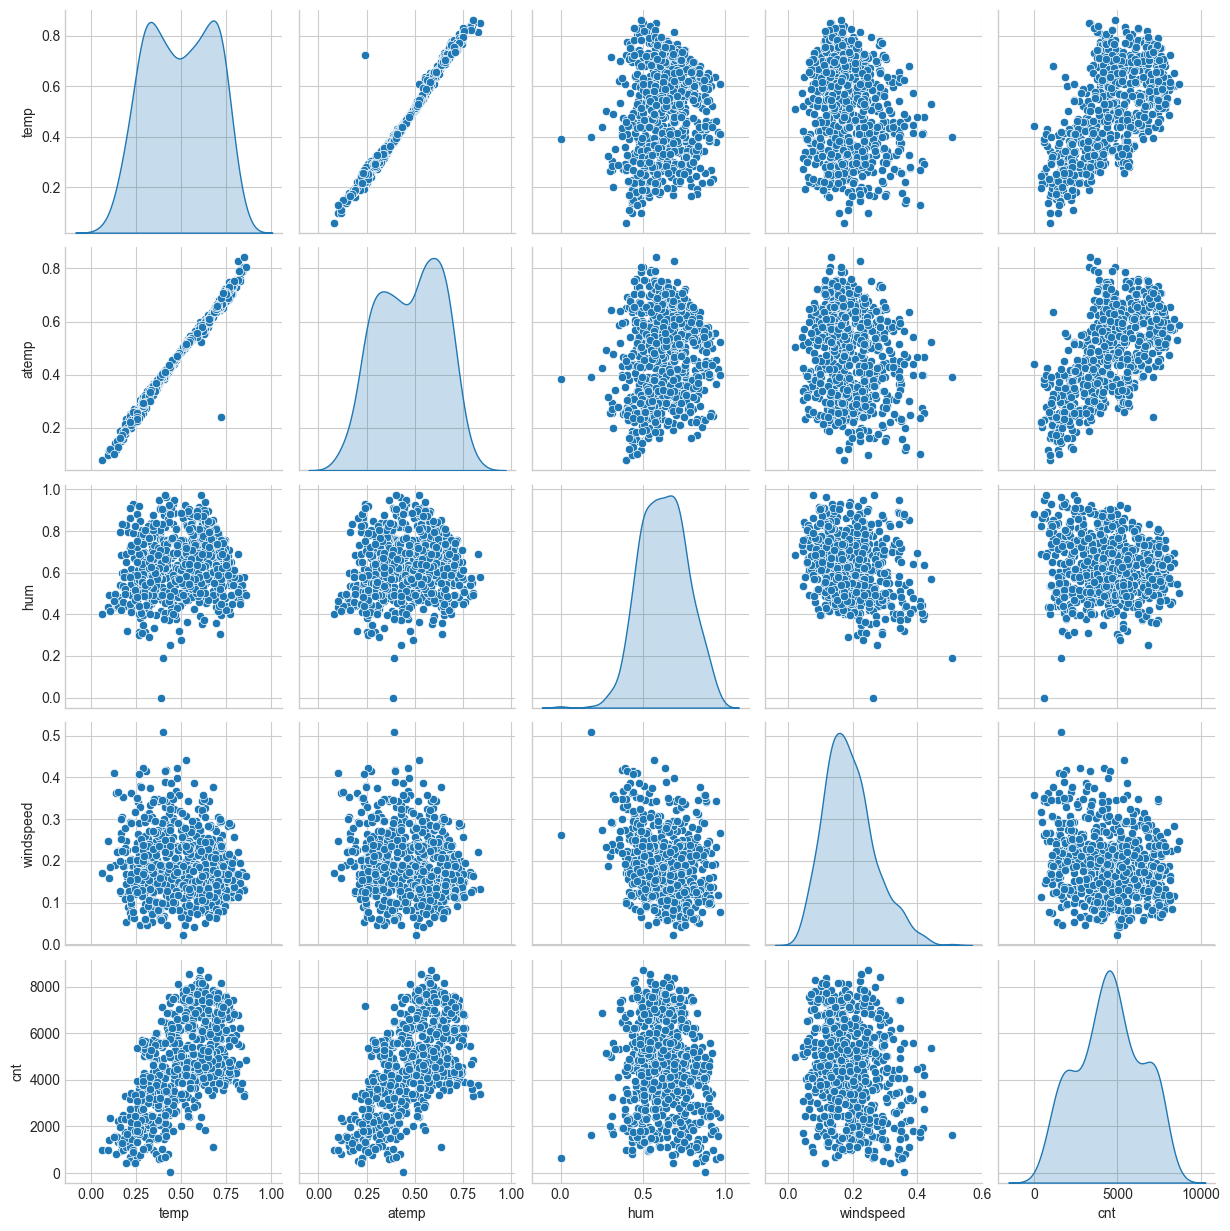

In [24]:
plt.style.use('seaborn-whitegrid')
sns.pairplot(daydata[['temp', 'atemp', 'hum', 'windspeed','cnt']], diag_kind='kde')
plt.show()

In [25]:
hourdata = pd.read_csv('hour.csv')
daydata = pd.read_csv('day.csv')
daydata.drop(columns=['dteday','instant','casual','registered','atemp'], axis=1, inplace=True)
hourdata.drop(columns=['dteday','instant','casual','registered','atemp'], axis=1, inplace=True)

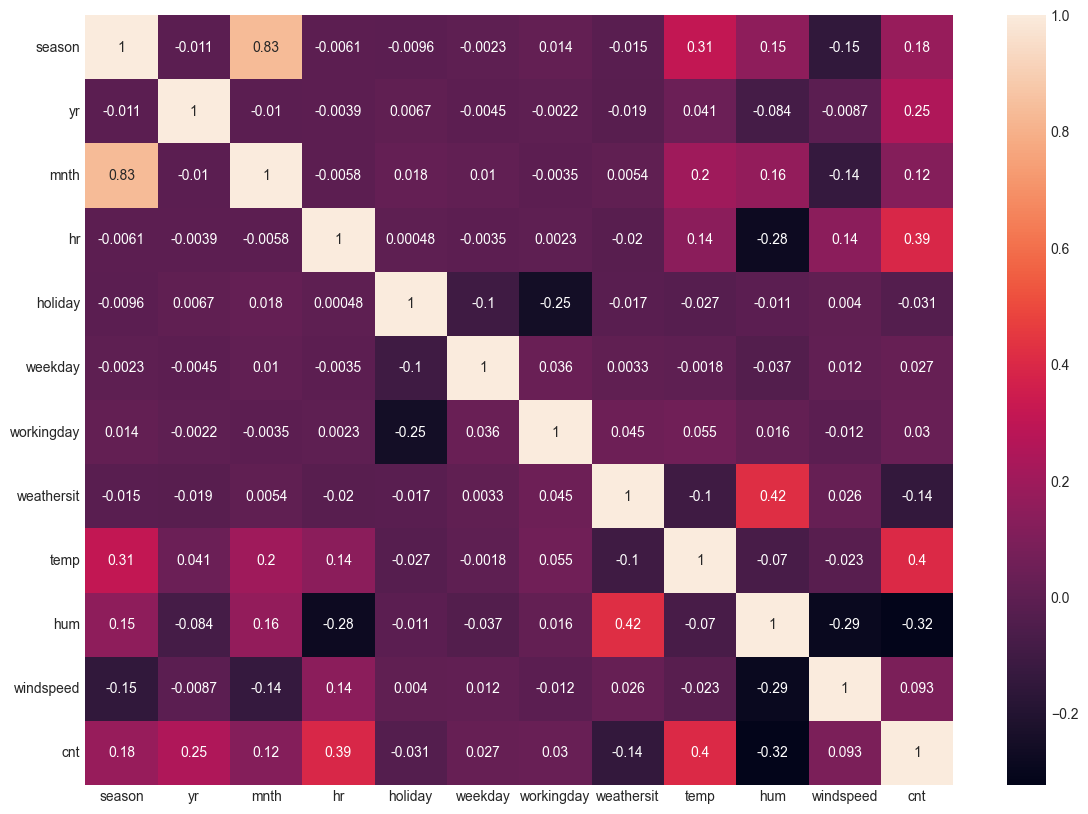

In [26]:
plt.figure(figsize=(14,10))
sns.heatmap(hourdata.corr(), annot=True)
plt.show()

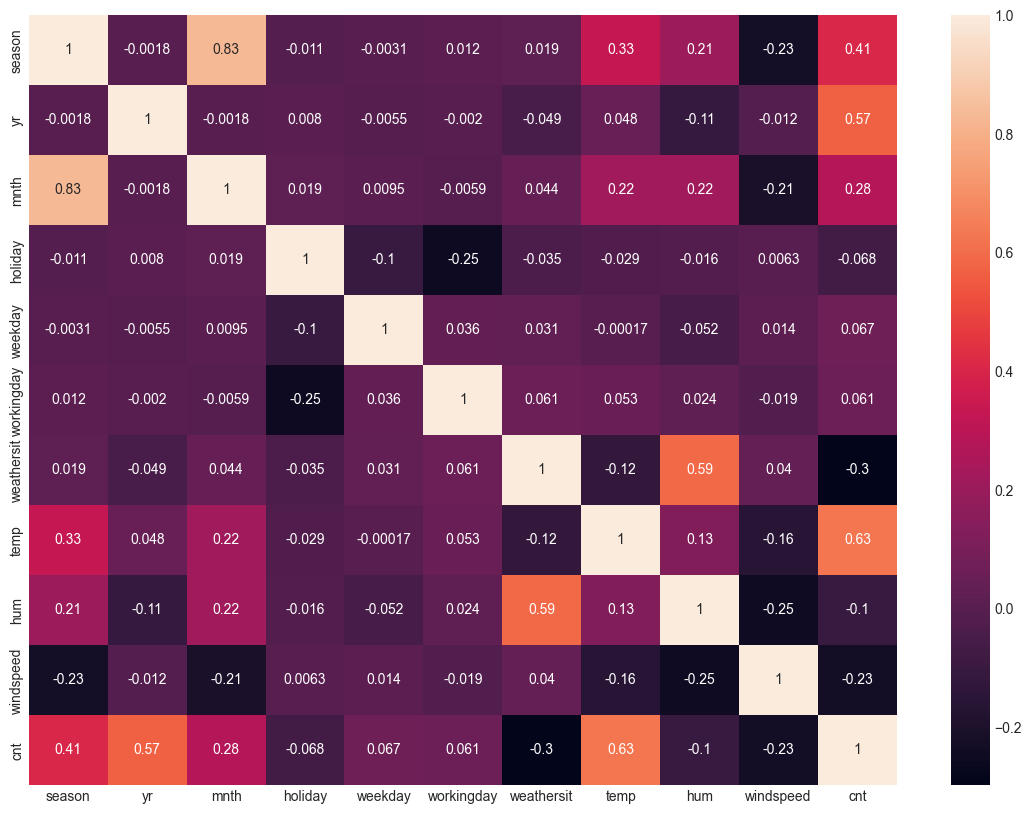

In [27]:
plt.figure(figsize=(14,10))
sns.heatmap(daydata.corr(), annot=True)
plt.show()

Dimentionality Reduction

PCA

In [28]:
hourdata = pd.read_csv('hour.csv')
daydata = pd.read_csv('day.csv')
daydata.drop(columns=['dteday','instant','casual','registered','atemp'], axis=1, inplace=True)
hourdata.drop(columns=['dteday','instant','casual','registered','atemp'], axis=1, inplace=True)

In [29]:
for col in ['season','mnth','weekday','weathersit']:
    dummy_cols = pd.get_dummies(daydata[col], drop_first=True, prefix=col)
    daydata = pd.concat([daydata,dummy_cols],axis=1)
    daydata.drop(columns=col, inplace=True)

In [30]:
y = daydata.pop('cnt')
x = daydata
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=69)

In [31]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
328,0,0,1,0.375000,0.643750,0.098896,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
207,0,0,1,0.775000,0.402917,0.183463,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
130,0,0,1,0.542500,0.632917,0.120642,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
458,1,0,1,0.466667,0.396667,0.100133,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
116,0,0,1,0.620000,0.835417,0.312200,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,1,0,1,0.557500,0.579583,0.149883,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
602,1,0,0,0.661667,0.712917,0.244408,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
619,1,0,1,0.577500,0.520000,0.092054,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
203,0,0,0,0.849167,0.500000,0.131221,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [32]:
y_train

328    2792
207    4656
130    4182
458    6772
116    3872
       ... 
439    6192
602    6053
619    7767
203    3285
54     1807
Name: cnt, Length: 584, dtype: int64

In [33]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [34]:
pca = PCA(random_state=69) 

pca.fit(X_train)

PCA(random_state=69)

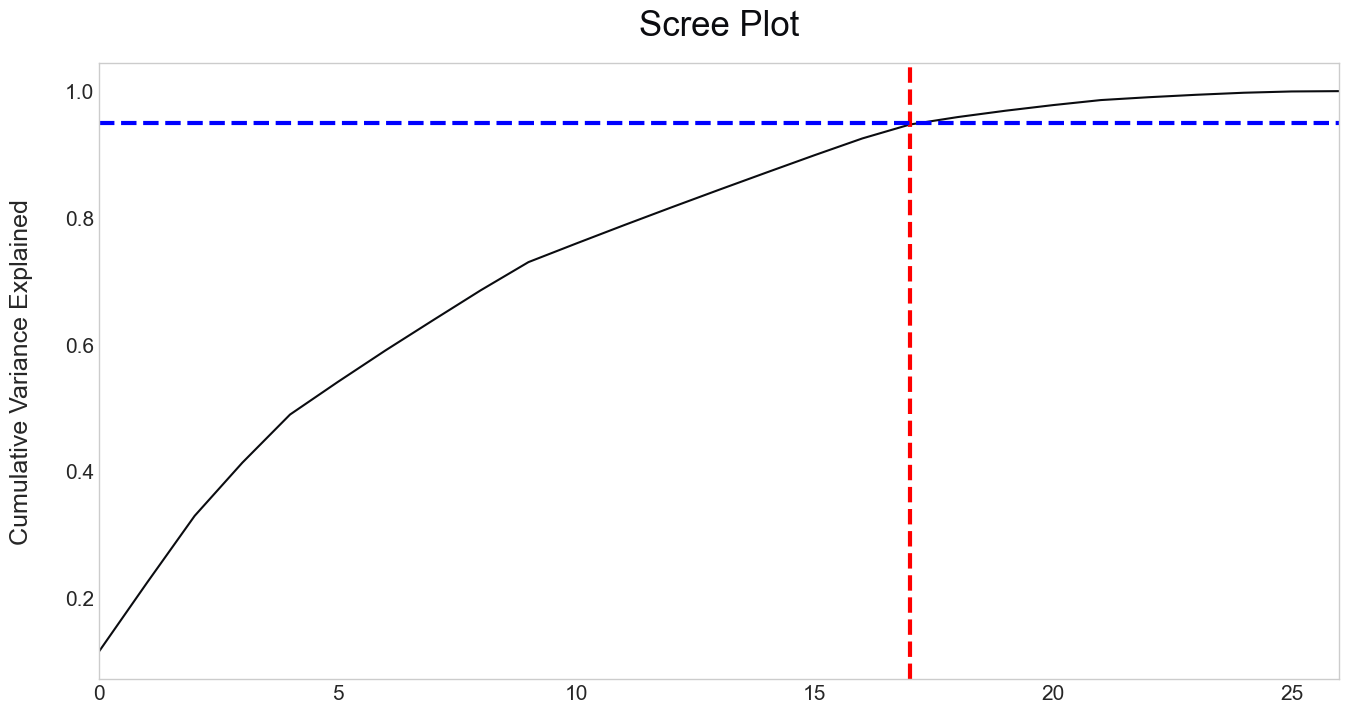

In [35]:
var_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=[16,8])
plt.plot(var_cumulative, color="#0b0c10")
plt.axvline(17, color="red", linestyle='--', linewidth='3')
plt.axhline(0.95, color="blue", linestyle='--', linewidth='3')
plt.title("Scree Plot", size=25, pad=20, color="#0b0c10")
plt.ylabel("Cumulative Variance Explained\n", size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0,26)
plt.grid(False)
plt.show()

 LazyPredict

In [36]:
from lazypredict.Supervised import LazyRegressor

In [37]:
# From the Scree Plot we are able to see that almost 95% of the variance is being explained by 17 variables. Therefore, use IncrementalPCA from Scikit Learn now to transform only 17 variables.
pca_final = IncrementalPCA(n_components=17)
daydata_train_pca = pca_final.fit_transform(X_train) 
daydata_test_pca = pca_final.transform(X_test)

In [38]:
reg=LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions = reg.fit(daydata_train_pca,daydata_test_pca,y_train,y_test)
print(models)

100%|██████████| 42/42 [00:13<00:00,  3.20it/s]

                               Adjusted R-Squared  R-Squared    RMSE   
Model                                                                  
ExtraTreesRegressor                          0.87       0.88  659.34  \
XGBRegressor                                 0.85       0.86  710.55   
LGBMRegressor                                0.85       0.86  715.00   
RandomForestRegressor                        0.84       0.86  718.47   
HistGradientBoostingRegressor                0.83       0.85  740.11   
BaggingRegressor                             0.81       0.83  790.68   
GradientBoostingRegressor                    0.80       0.83  804.59   
DecisionTreeRegressor                        0.73       0.76  943.88   
AdaBoostRegressor                            0.72       0.75  967.68   
HuberRegressor                               0.70       0.74  990.10   
PoissonRegressor                             0.70       0.74  991.71   
SGDRegressor                                 0.70       0.73  99

ExtraTreesRegressor

In [39]:
etr = ExtraTreesRegressor()

etr.fit(daydata_train_pca, y_train)

ExtraTreesRegressor()

In [40]:
y_pred_test = etr.predict(daydata_test_pca)

print("R² score on test data: ", r2_score(y_true=y_test, y_pred=y_pred_test))

R² score on test data:  0.889152730429404


Text(0.5, 1.0, 'ExtraTrees')

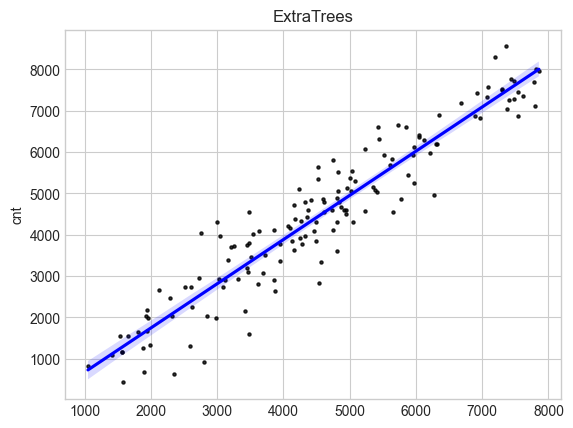

In [42]:
fig, axes = plt.subplots()
sns.regplot( x = y_pred_test, y = y_test,
            scatter_kws = {'s':5, 'color':'black'}, line_kws = {'color':'blue'}).set_title('ExtraTrees')

RandomForestRegressor

In [43]:
hourdata = pd.read_csv('hour.csv')
daydata = pd.read_csv('day.csv')
daydata.drop(columns=['dteday','instant','casual','registered','atemp'], axis=1, inplace=True)
hourdata.drop(columns=['dteday','instant','casual','registered','atemp'], axis=1, inplace=True)

In [44]:
y = hourdata.pop('cnt')
x = hourdata
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=69)

In [45]:
# train
model = RandomForestRegressor()
model.fit(X_train, y_train) 

y_pred_test = model.predict(X_test)

print("R² score on test data: ", r2_score(y_true=y_test, y_pred=y_pred_test))  


R² score on test data:  0.9441634237913873


Text(0.5, 1.0, 'Random Forest')

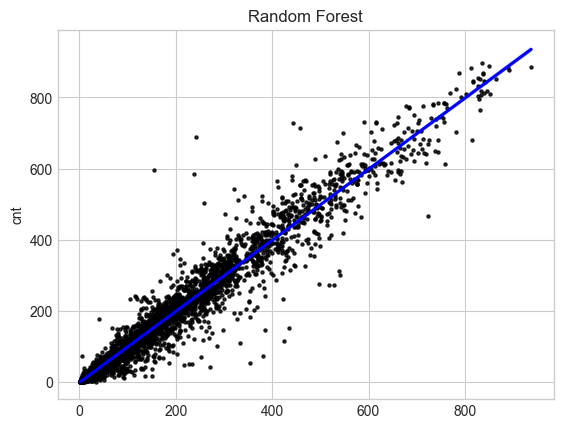

In [46]:
fig, axes = plt.subplots()
sns.regplot( x = y_pred_test, y = y_test,
            scatter_kws = {'s':5, 'color':'black'}, line_kws = {'color':'blue'}).set_title('Random Forest')

In [47]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [48]:
for i in range(X_test.shape[1]):
    print("%d. %s (%f)" % (i + 1, list(X_train.columns)[indices[i]], importances[indices[i]]))

1. hr (0.614614)
2. temp (0.136040)
3. yr (0.078842)
4. workingday (0.056588)
5. hum (0.029917)
6. season (0.020836)
7. mnth (0.018000)
8. weathersit (0.017813)
9. weekday (0.013976)
10. windspeed (0.010671)
11. holiday (0.002703)


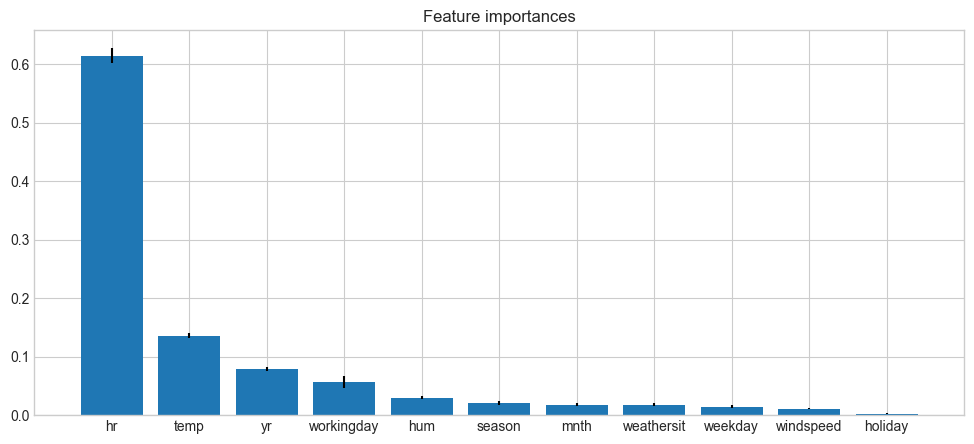

In [49]:
plt.figure(figsize=(12,5))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], 
        yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [list(X_train.columns)[i] for i in indices])
plt.xlim([-1, X_test.shape[1]])
plt.show()

Again:Daydata analysis

In [50]:
hourdata = pd.read_csv('hour.csv')
daydata = pd.read_csv('day.csv')
daydata.drop(columns=['dteday','instant','casual','registered','atemp'], axis=1, inplace=True)
hourdata.drop(columns=['dteday','instant','casual','registered','atemp'], axis=1, inplace=True)

In [51]:
y = daydata.pop('cnt')
x = daydata
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=69)

In [52]:
# train
model = RandomForestRegressor()
model.fit(X_train, y_train) 

y_pred_test = model.predict(X_test)

print("R² score on test data: ", r2_score(y_true=y_test, y_pred=y_pred_test))  

R² score on test data:  0.9102811341851171


Text(0.5, 1.0, 'Random Forest')

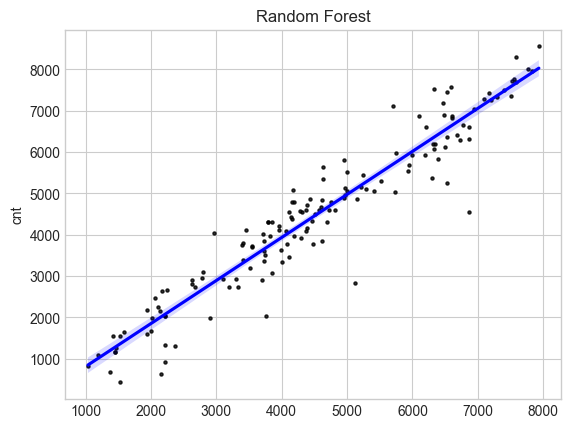

In [53]:
fig, axes = plt.subplots()
sns.regplot( x = y_pred_test, y = y_test,
            scatter_kws = {'s':5, 'color':'black'}, line_kws = {'color':'blue'}).set_title('Random Forest')

In [54]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [55]:
for i in range(X_test.shape[1]):
    print("%d. %s (%f)" % (i + 1, list(X_train.columns)[indices[i]], importances[indices[i]]))

1. temp (0.463218)
2. yr (0.298912)
3. hum (0.066083)
4. season (0.060769)
5. windspeed (0.037624)
6. mnth (0.026897)
7. weathersit (0.022974)
8. weekday (0.015642)
9. workingday (0.004632)
10. holiday (0.003249)


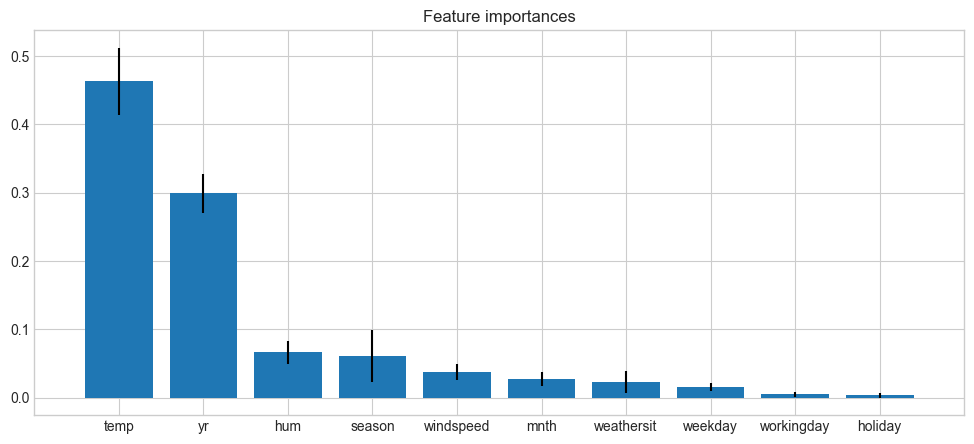

In [56]:
plt.figure(figsize=(12,5))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], 
        yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [list(X_train.columns)[i] for i in indices])
plt.xlim([-1, X_test.shape[1]])
plt.show()